In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from my_ml_package.stat import var, covar, covar_matrix
from my_ml_package.visualize import plot_data_points

## What's the underlying idea of PCA for dimensionality reduction?

In [ ]:
# People data with Height cm, Weight kg
people = np.array([
    [175, 75],  # Adult    1
    [60, 5],    # Baby     
    [50, 4],    # Baby     1
    [70, 7],    # Baby     
    [180, 80],  # Adult    1
    [178, 72],  # Adult (new) 1
    [172, 70],  # Adult (new)  
    [169, 74],  # Adult (new)  
    [55, 6],    # Baby (new)  
    [65, 8]     # Baby (new)  1
])

In [24]:
# the frequency of hangouts with Friend A and Friend B within a week.
hangout = np.array([
   #Friend A     Friend B
        [2,       4],    # Me
        [10,      2],    # Person 1
        [20,      3]     # Person 2
])

#     -M1      -M2
#      P    P
#      P    N

In [26]:
# Document(rows)-word(columns) matrix
data = np.array([
    # good superb
    [0,    0],  # D1: Neutral or negative
    [3,    0],  # D2: Moderately positive
    [5,    2],  # D3: Positive
    [2,    5]   # D4: Highly positive
])

good = data[:,0]
superb = data[:,1]
print(good)
print(superb)


[0 3 5 2]
[0 0 2 5]


In [ ]:
# Word-document matrix
# Document 1 (D1): Negative sentiment
# Document 2 (D2): Positive sentiment
# Document 3 (D3): Strongly Positive sentiment
# A = np.array([
#     # D1   D2   D3
#      [3,   0,   0], # bad
#      [0,   2,   1], # good
#      [0,   1,   3]  # superb
# ])


Histogram

In [20]:
# fig, ax = plt.subplots(figsize=(5, 3))
# ax.hist(good, bins=15, alpha=1, label=f'Var(good)={np.var(good):.2f}')
# ax.hist(superb, bins=15, alpha=0.5, label=f'Var(superb)= {np.var(superb):.2f}')
# ax.set_title('Variance Demonstration')
# ax.legend()

Datapoints on each dimension

In [22]:

# # Data points for the two versions
# good = [0, 3, 5, 2]
# superb = [0, 0, 2, 5]
# excellent = [0, 1, 2, 3]
# print('Good: Means=', np.mean(good), 'Var=', np.var(good))
# print('Superb: Means=', np.mean(superb), 'Var=', np.var(superb))
# print('Excellent: Means=', np.mean(excellent), 'Var=', np.var(excellent))

# # Adjusting the plot to prevent overlapping by offsetting the two versions on separate axes
# plt.figure(figsize=(10, 2))  # Adjusting figure size for clarity

# # Offsetting the two versions slightly on the y-axis to prevent overlapping
# y_offset = 0.1  # Offset amount

# # Plot for the good version as points, offset upwards
# plt.plot(good, [-2*y_offset]*len(good), 'x', label='Good (0, 3, 5, 2)', markersize=10, color='green')
# plt.axvline(np.mean(good), color='green', linestyle='--',)

# # Plot for the original version as points, offset downwards
# plt.plot(superb, [-y_offset]*len(superb), 'o', label='Superb (0, 0, 2, 3)', markersize=10, color='blue')
# plt.axvline(np.mean(superb), color='blue', linestyle='--', )


# # Plot for the add-1 version as points, offset upwards
# plt.plot(excellent, [y_offset]*len(excellent), 's', label='Excellent (0, 1, 2, 3)', markersize=10, color='red')
# plt.axvline(np.mean(excellent), color='red', linestyle='--', )

# # Removing y-axis and ticks as the focus is on the values' spread
# plt.yticks([])
# plt.xticks(range(4))  # Assuming the possible range of values for illustration
# plt.xlabel('Values')

# # Adding a legend to distinguish the versions
# plt.legend()

# # Show grid on the x-axis to indicate value positions
# plt.grid(True, axis='x')

# # Display the plot
# plt.show()


## Covariance Matrix
* What is variance?
* What is covariance?
* What is covariance matrix?

### Variance

In [6]:
def covar(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)
    return sum((x - x_mean) * (y - y_mean)) / (n - 1)

covar(data[:, 0], data[:,0])



4.333333333333333

### Covariance

In [31]:
good =  data[:,0]
superb = data[:, 1]

def covar(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    return np.sum((x-x_mean) * (y-y_mean)) / (len(x)-1)

def covar_matrix(data):
    n = data.shape[1]
    covar_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            covar_matrix[i, j] = covar(data[:, i], data[:, j])

    return covar_matrix
    
covar_matrix(data)

#            # good                      superb
#         [  
# # good       Var(good)                  covar(good, superb)
# # superb     covar( superb, good)         Var(superb)
#          ]
# Our goal: a vector to do the dot product with the original features


4.500000010063152

## Eigenvalue, Eigenvecor
<!-- We can do Eigen-decomposition on a symmetric matrix $A$
<!-- * $AV=VD$
* Importantly, if A is a symmetric matrix, $v_1, ..., v_d$ are orthogonal to each other. **V is an orthogonal matrix**
* D is a diagonal matrix
* $A=VDV^T$  -->


* all the eigenvalues of $A$ are nonnegative $A$ is positive semi-difinite

$$
A=P D P^{-1}
$$

Where:
- $A$ is the square matrix being decomposed.
- $P$ is a matrix whose columns are the eigenvectors of $A$.
- $D$ is a diagonal matrix whose diagonal elements are the eigenvalues of $A$.
- $P^{-1}$ is the inverse of matrix $P$. -->

$ A p = \lambda p$,  where $p \in \mathbb{R}^{d}$
$$
\left[\begin{array}{cccc}
A_{11} & A_{12} & \cdots & A_{1 d} \\
A_{21} & A_{22} & \cdots & A_{2 d} \\
\vdots & \vdots & \ddots & \vdots \\
A_{d 1} & A_{d 2} & \cdots & A_{d d}
\end{array}\right]\left[\begin{array}{c}
p_1 \\
p_2 \\
\vdots \\
p_d
\end{array}\right]
$$

* $A$: A general square matrix. In your description, it's used interchangeably with $S$, but typically $A$ can represent any square matrix, not necessarily symmetric.
* $v$: An eigenvector of $A$. In the context given, it plays the same role as $p$ but for the matrix $A$.
* $v_i$: The $i^{th}$ element of the eigvector $v$ (or $p$).
* $A_{ij}$: The element of matrix $A$ (or $S$) in the $i^{th}$ row and $j^{th}$ column.

## Eigenvalue, Eigenvecor
<!-- We can do Eigen-decomposition on a symmetric matrix $A$
<!-- * $AV=VD$
* Importantly, if A is a symmetric matrix, $v_1, ..., v_d$ are orthogonal to each other. **V is an orthogonal matrix**
* D is a diagonal matrix
* $A=VDV^T$  -->


* all the eigenvalues of $A$ are nonnegative $A$ is positive semi-difinite

$$
A=P D P^{-1}
$$

Where:
- $A$ is the square matrix being decomposed.
- $P$ is a matrix whose columns are the eigenvectors of $A$.
- $D$ is a diagonal matrix whose diagonal elements are the eigenvalues of $A$.
- $P^{-1}$ is the inverse of matrix $P$. -->

$ A p = \lambda p$,  where $p \in \mathbb{R}^{d}$
$$
\left[\begin{array}{cccc}
A_{11} & A_{12} & \cdots & A_{1 d} \\
A_{21} & A_{22} & \cdots & A_{2 d} \\
\vdots & \vdots & \ddots & \vdots \\
A_{d 1} & A_{d 2} & \cdots & A_{d d}
\end{array}\right]\left[\begin{array}{c}
p_1 \\
p_2 \\
\vdots \\
p_d
\end{array}\right]
$$

* $A$: A general square matrix. In your description, it's used interchangeably with $S$, but typically $A$ can represent any square matrix, not necessarily symmetric.
* $v$: An eigenvector of $A$. In the context given, it plays the same role as $p$ but for the matrix $A$.
* $v_i$: The $i^{th}$ element of the eigvector $v$ (or $p$).
* $A_{ij}$: The element of matrix $A$ (or $S$) in the $i^{th}$ row and $j^{th}$ column.

In [37]:
def covar(x, y):
    """ Covariance of two variables.
    It measures how two variables change together by 
     the average of the product of the differences of each data point from the sample mean.
    Equation: cov(x, y) = Σ (x_i - mean(x)) * (y_i - mean(y)) / n
    Args:
        x, y (np.ndarray): Two NumPy arrays of the same length."""
    return np.sum((x - x.mean())*(y - y.mean()))/len(x)

def covar_matrix(X):
    """ Covariance matrix of a dataset.
    It is a square matrix that describes the covariance between two or more variables in a dataset.
    Args:
        X (np.ndarray): A NumPy array of shape (n_samples, n_features)."""
    n_samples, n_features = X.shape
    covar_matrix = np.zeros((n_features, n_features))
    for i in range(n_features):
        for j in range(n_features):
            covar_matrix[i, j] = covar(X[:, i], X[:, j])
    return covar_matrix

# plot eigenvectors on the data plot marked by components
def plot_eigenvectors(data, eigenvector):
    fig, ax = plt.subplots()
    ax.scatter(data[:,0], data[:,1])
    # add label on the data points
    labels = ['Negative', 'Positive', 'Moderately Positive', 'Strongly Positive']
    for i in range(data.shape[0]):
        ax.text(data[i,0], data[i,1], labels[i], fontsize=6, ha='right')
    for i in range(2):
        ax.quiver(0, 0, eigenvector[i,0], eigenvector[i,1], angles='xy', scale_units='xy', scale=1, color='red')
        ax.text(eigenvector[i,0], eigenvector[i,1], f'Component {i+1}', fontsize=6)
    ax.set_aspect('equal')
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 6)
    plt.show()

# Step1: Computing covariance matrix
# data = (data - data.mean(axis=0)) 
covmat=covar_matrix(data) * len(data) / (len(data) - 1)

# Step2: Performing EigenDecomposition
lambd, eigenvector= np.linalg.eig(covmat)

# Step3: Ordering the eigenvalues and eigenvectors
idx = lambd.argsort()[::-1]
lambd = lambd[idx]
eigenvector = eigenvector[:,idx]
print('Covariance matrix: \n{}'.format(covmat))
print('Eigen values: {}'.format(lambd))
print('Eigen vectors: {}'.format(eigenvector))
# plot_eigenvectors(data, eigenvector)
# Covariance matrix: 
# [[4.33333333 0.83333333]
#  [0.83333333 5.58333333]]
# Eigen values: [6.         3.91666667]
# Eigen vectors: [[-0.4472136  -0.89442719]
#  [-0.89442719  0.4472136 ]]
principal_components = np.array([[-0.4472136,  -0.89442719],  # principal component 1
 [-0.89442719,  0.4472136 ]]) # principal component 2
# 6. 
print("Reduced Feature: ", data.dot(principal_components))

# print(np.var() * len(data) / (len(data) - 1)) # 6.000000013417536



Covariance matrix: 
[[4.33333333 0.83333333]
 [0.83333333 5.58333333]]
Eigen values: [6.         3.91666667]
Eigen vectors: [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Reduced Feature:  [ 0.         -1.3416408  -4.02492238 -5.36656315]


<!-- without centering, PCA might capture variance related to the offset from the origin.  -->

In [38]:
# Step4: Projecting the data onto the new feature space
# matrix propagation
data_pca = np.dot(data-data.mean(axis=0), eigenvector) 
# print(data_pca)
print(covar(data_pca[:,0], data_pca[:,1]))
# 2.220446049250313e-16-> approximating to 0

# print('Variance of PCA transformed data: {}, {}'.format(var(data_pca1), var(data_pca2)))
# print('Explained Variance Ratio: {}'.format(lambd/np.sum(lambd)))
# print('Variance of PCA transformed data: {}, {}'.format(var(data_pca1)*len(data)/(len(data)-1), var(data_pca2)*len(data)/(len(data)-1)))

-2.220446049250313e-16


[-1.25 -1.25  0.75  1.75]


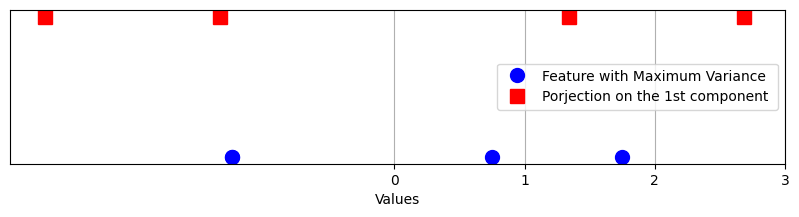

In [80]:

# Data points for the two versions
original_version = [0, 0, 2, 3] - np.mean([0, 0, 2, 3])
print(original_version)
projected_version = list(data_pca1)

# Adjusting the plot to prevent overlapping by offsetting the two versions on separate axes
plt.figure(figsize=(10, 2))  # Adjusting figure size for clarity

# Offsetting the two versions slightly on the y-axis to prevent overlapping
y_offset = 0.1  # Offset amount

# Plot for the original version as points, offset downwards
plt.plot(original_version, [-y_offset]*len(original_version), 'o', label='Feature with Maximum Variance', markersize=10, color='blue')

# Plot for the add-1 version as points, offset upwards
plt.plot(projected_version, [y_offset]*len(projected_version), 's', label='Porjection on the 1st component ', markersize=10, color='red')

# Removing y-axis and ticks as the focus is on the values' spread
plt.yticks([])
plt.xticks(range(4))  # Assuming the possible range of values for illustration
plt.xlabel('Values')

# Adding a legend to distinguish the versions
plt.legend()

# Show grid on the x-axis to indicate value positions
plt.grid(True, axis='x')

# Display the plot
plt.show()


In [45]:

# verify the result: covmat*eigenvector = lambd*eigenvector
# print('Verify the result: covmat*eigenvector = lambd*eigenvector')
# print(np.dot(covmat, eigenvector))
# print(lambd*eigenvector)

# let's understand  covmat . S P=P D
# print(np.dot(covmat, eigenvector[:, 0])) # (d, d) * (d, 1)
# print(eigenvector[:, 0]*lambd[0]) # (d, 1)

# check whether eigenvector is orthogonal
# np.dot(eigenvector[:, 0], eigenvector[:, 1])

### In assignment, you can simply use Scikit-Learn 

In [54]:
data = np.array([
    # good superb
    [0,    0],  # D1: Neutral or negative
    [3,    0],  # D2: Moderately positive
    [5,    2],  # D3: Positive
    [2,    5]   # D4: Highly positive
])

In [14]:
from sklearn.decomposition import PCA
# covariance, eigenvalues and eigenvectors from sklearn PCA
pca = PCA(n_components=2, random_state=2)
pca.fit(data)
covmat = pca.get_covariance()
lambd = pca.explained_variance_ 
# print('Covariance matrix: \n{}'.format(covmat))
# print('Explained Variance Ratio: {}'.format(pca.explained_variance_ratio_))
print('Eigen values: {}'.format(lambd))
# print('Eigen vectors: {}'.format(eigenvector))
# transform the data
data_pca = pca.transform(data)
# print('Variance of PCA transformed data: {}, {}'.format(var(data_pca[:,0]), var(data_pca[:,1])))
# Covariance matrix: 
# [[4.33333333 0.83333333]
#  [0.83333333 5.58333333]]
# Eigen values: [6.         3.91666667]
# Eigen vectors: [[-0.4472136  -0.89442719]
#  [-0.89442719  0.4472136 ]]



Eigen values: [6.         3.91666667]


In [17]:
covar(data_pca[:,0], data_pca[:,1])

2.220446049250313e-16

## Remove correlation using Eigenvector
* Project data into new coordinates
    * eigenvalues/eigenvectors are not actually ordered typically but in this case they are and the first eigenvalue accounts for the most variance. By that standard it is superior.
* Why does the transformation of eigenvector remove the correlation?
    + "covariance among each pair of the principal axes is zero (the principal axes are uncorrelated i.e. they are orthogonal to each other)." (copy from 4.7)

In [120]:
# Z=X^T P
Z = np.dot(Xnorm, eigenvector) # (n, D) * (D, d) D = d
eigenvector.shape
# Z # (D, D)

# check covariance
X = Xnorm
print("The orginal covariance/unnormalized correlations:")
print(np.dot(X.T, X)/len(X) -  np.dot(X.mean(axis=0, keepdims=True).T , X.mean(axis=0, keepdims=True)))

print("The covariance/unnormalized correlations after removing correlation:")
X = Z
print(np.dot(X.T, X)/len(X) -  np.dot(X.mean(axis=0, keepdims=True).T , X.mean(axis=0, keepdims=True)))

The orginal covariance/unnormalized correlations:
[[1.        0.7355261]
 [0.7355261 1.       ]]
The covariance/unnormalized correlations after removing correlation:
[[1.73552610e+00 2.87461239e-16]
 [2.87461239e-16 2.64473903e-01]]


## Back to the idea of dimensionality reduction
* Could we use distance metrics we learnt from last week?
        $$
        \mathcal{L}=\sum_{i<j}\left(d_{i j}-\left\|\mathbf{y}_i-\mathbf{y}_j\right\|\right)^2
        $$
        + How many computations we need?
        + Projection-based method
* t-SNE: $p_{i j}=\frac{w_{i j}}{Z}$ is the normalized similarity between points i and j. 
    + Two closed neighbours in the high-dimensional space -> large $p_{i j}$. Clearly, it gives high price for putting closd neighbours far away. 
    + How about the price to put points far away closed? 
    + How to define $q_{i j}$? 
    + How close neighbours attract each other while all points repulse each other? How to optimize?
            $$\min \mathcal{L}=\sum_{i, j} p_{i j} \log \frac{p_{i j}}{q_{i j}} = \sum_{i j} p_{i j} \log p_{i j}-\sum_{i j} p_{i j} \log q_{i j}$$ 
            $$\min -\sum_{i, j} p_{i j} \log w_{i j}+\log \sum_{i, j} w_{i j}$$
$w_{i j}$=sim($x_i^d, x_j^d$)-> normalized similarity $q_{i , j}$
            <!-- ![image.png](attachment:image.png) -->
    + Some materials for different tastes: [High-level visualization](https://www.enjoyalgorithms.com/blog/tsne-algorithm-in-ml); [another high-level visualization](https://www.youtube.com/watch?v=NEaUSP4YerM&t=215s); [Concrete explanation and background in math](https://www.youtube.com/watch?v=MnRskV3NY1k&t=1896s)
    + Why do we need t-SNE instead of PCA? See [the image](https://www.astroml.org/_images/fig_S_manifold_PCA_1.png) for an intuitive unserstanding.
    

## Variance vs Coefficient Correlation

In [28]:
f1 = np.array([1,2,3,4,5])
f2 = np.array([1,2.5,3,4.9,4.9])
x = np.stack((f1, f2),) # (num_feat, num_data)
print((np.corrcoef(x, rowvar=True)))


[[1.         0.96674865]
 [0.96674865 1.        ]]


In [27]:
c = np.cov(x, rowvar=True, dtype=None)
print(c)
d = np.diag(c)
print(d)
stddev = np.sqrt(d.real)
print(stddev)
corr = c/stddev[:, None]
corr = corr/stddev[None, :]
print(corr)

[[2.5   2.55 ]
 [2.55  2.783]]
[2.5   2.783]
[1.58113883 1.6682326 ]
[[1.         0.96674865]
 [0.96674865 1.        ]]


In [126]:
# Measure the reconstruction error
# n_comp = range(1, 10)
# rec_error = np.zeros(len(n_comp))
# for k in n_comp:
#     pca = PCA(n_components=k)
#     Zred = pca.fit_transform(Xnorm)
#     Xrec = pca.inverse_transform(Zred)
#     rec_error[k-1] = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
#     # print("k={}, rec_error={}".format(k, rec_error[k]))
# #Visualize the change in error
# plt.plot(n_comp,rec_error)
# plt.xlabel('No of principal components (k)')
# plt.ylabel('Reconstruction Error')
# np.linalg.norm(Xnorm-Xrec, 'fro')

[0.40242142 0.14923182 0.12059623]
0.6722494722420844
